In [1]:
import torch
from torchviz import make_dot
from torchvision import datasets, transforms
from autoPyTorch import AutoNetClassification

import matplotlib.pyplot as plt
import numpy as np

/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_ds = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))]))

test_ds = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))]))

In [3]:
X_train, X_test, y_train, y_test = train_ds.data.numpy().reshape(-1, 28*28), test_ds.data.numpy().reshape(-1, 28*28) ,train_ds.targets.numpy(), test_ds.targets.numpy()

# running Auto-PyTorch
autoPyTorch = AutoNetClassification("tiny_cs",  # config preset
                                    log_level='info',
                                    max_runtime=2000,
                                    min_budget=30,
                                    max_budget=120)

autoPyTorch.fit(X_train, y_train, validation_split=0.1)
y_pred = autoPyTorch.predict(X_test)

print("Accuracy score", np.mean(y_pred.reshape(-1) == y_test))

/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
10:19:27 WORKER: start listening for jobs
10:19:27 [AutoNet] Start bohb
10:19:27 DISPATCHER: started the 'discover_worker' thread
10:19:27 DISPATCHER: started the 'job_runner' thread
10:19:27 DISPATCHER: Pyro daemon running on 192.168.225.61:49724
10:19:27 DISPATCHER: discovered new worker, hpbandster.run_0.worker.LDN-C02Z96Q0LVDL.52094.-14453086656
10:19:27 HBMASTER: adjusted queue size to (0, 1)
10:19:27 DISPATCHER: A new worker triggered discover_worker
10:19:27 HBMASTER: starting run at 1603514967.375231
10:19:27 WORKER: start processing job (0, 0, 0)
10:19:

10:22:52 WORKER: registered result for job (0, 0, 1) with dispatcher
10:22:52 WORKER: start processing job (1, 0, 0)
10:22:52 Fit optimization pipeline
10:22:52 [AutoNet] CV split 0 of 1
10:22:52 Reduced initial budget 119.80252766609192 to cv budget 119.79954981803894 compensate for 0.0029778480529785156
10:24:43 Finished train with budget 119.79954981803894: Preprocessing took 26s, Training took 82s, Wrap up took 0s. Total time consumption in s: 110
10:24:43 [AutoNet] Done with current split!
10:24:43 Aggregate the results across the splits
10:24:43 Process 1 additional result(s)
10:24:43 Training ['shapedresnet'] with budget 120.0 resulted in optimize-metric-loss: -86.73333333333333 took 110.98744130134583 seconds
10:24:43 WORKER: registered result for job (1, 0, 0) with dispatcher
10:24:43 WORKER: start processing job (1, 0, 1)
10:24:43 Fit optimization pipeline
10:24:43 [AutoNet] CV split 0 of 1
10:24:43 Reduced initial budget 119.73478674888611 to cv budget 119.73102378845215 com

10:37:07 Finished train with budget 119.76756501197815: Preprocessing took 27s, Training took 82s, Wrap up took 3s. Total time consumption in s: 113
10:37:07 [AutoNet] Done with current split!
10:37:07 Aggregate the results across the splits
10:37:07 Process 1 additional result(s)
10:37:07 Training ['shapedresnet'] with budget 120.0 resulted in optimize-metric-loss: -81.16666666666667 took 114.11958718299866 seconds
10:37:07 WORKER: registered result for job (4, 0, 0) with dispatcher
10:37:07 WORKER: start processing job (5, 0, 0)
10:37:07 Fit optimization pipeline
10:37:07 [AutoNet] CV split 0 of 1
10:37:07 Reduced initial budget 119.77713513374329 to cv budget 119.77356791496277 compensate for 0.003567218780517578
10:39:00 Finished train with budget 119.77356791496277: Preprocessing took 27s, Training took 81s, Wrap up took 2s. Total time consumption in s: 112
10:39:00 [AutoNet] Done with current split!
10:39:00 Aggregate the results across the splits
10:39:00 Process 1 additional re

10:42:24 WORKER: start processing job (6, 0, 0)
10:42:24 Fit optimization pipeline
10:42:24 [AutoNet] CV split 0 of 1
10:42:24 Reduced initial budget 119.70188331604004 to cv budget 119.6982090473175 compensate for 0.0036742687225341797
10:44:14 Finished train with budget 119.6982090473175: Preprocessing took 28s, Training took 81s, Wrap up took 0s. Total time consumption in s: 110
10:44:15 [AutoNet] Done with current split!
10:44:15 Aggregate the results across the splits
10:44:15 Process 1 additional result(s)
10:44:15 Training ['shapedresnet'] with budget 120.0 resulted in optimize-metric-loss: -86.58333333333333 took 110.79069781303406 seconds
10:44:15 WORKER: registered result for job (6, 0, 0) with dispatcher
10:44:15 WORKER: start processing job (7, 0, 0)
10:44:15 Fit optimization pipeline
10:44:15 [AutoNet] CV split 0 of 1
10:44:15 Reduced initial budget 119.6907479763031 to cv budget 119.67741799354553 compensate for 0.01332998275756836
10:46:06 Finished train with budget 119.

Accuracy score 0.9548


In [4]:
pytorch_model = autoPyTorch.get_pytorch_model()
print(pytorch_model)

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sequential(
    (0): ResBlock(
      (layers): Sequential(
        (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
        (2): Linear(in_features=100, out_features=100, bias=True)
        (3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU()
        (5): Linear(in_features=100, out_features=100, bias=True)
      )
    )
    (1): ResBlock(
      (layers): Sequential(
        (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
        (2): Linear(in_features=100, out_features=100, bias=True)
        (3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU()
        (5): Linear(in_features=100, out_features=100, bias=True)
      )
    )
    (2): ResBlock(
      (layers): Sequential(
        (0): BatchNo

In [7]:
x = torch.randn(1, 100)
y = pytorch_model(x)
arch = make_dot(y.mean(), params=dict(pytorch_model.named_parameters()))
arch.format="pdf"
arch.filename = "convnet_arch"
arch.render(view=False)

'image2.png'

In [5]:
autoPyTorch.autonet_config

{'embeddings': ['none'],
 'lr_scheduler': ['cosine_annealing'],
 'networks': ['shapedresnet'],
 'preprocessors': ['truncated_svd'],
 'target_size_strategies': ['none'],
 'over_sampling_methods': ['none'],
 'under_sampling_methods': ['none'],
 'batch_loss_computation_techniques': ['standard'],
 'imputation_strategies': ['median'],
 'initialization_methods': ['default'],
 'loss_modules': ['cross_entropy_weighted'],
 'normalization_strategies': ['standardize'],
 'optimizer': ['sgd'],
 'hyperparameter_search_space_updates': <autoPyTorch.utils.hyperparameter_search_space_update.HyperparameterSearchSpaceUpdates at 0x134cad310>,
 'log_level': 'info',
 'max_runtime': 2000,
 'min_budget': 30,
 'max_budget': 120,
 'validation_split': 0.1,
 'result_logger_dir': '.',
 'categorical_features': None,
 'dataset_name': None,
 'run_id': '0',
 'task_id': -1,
 'algorithm': 'bohb',
 'portfolio_type': 'greedy',
 'budget_type': 'time',
 'eta': 3,
 'min_workers': 1,
 'working_dir': '.',
 'network_interface_na

In [6]:
autoPyTorch.get_hyperparameter_search_space()

Configuration space object:
  Hyperparameters:
    CreateDataLoader:batch_size, Type: Constant, Value: 125
    Imputation:strategy, Type: Categorical, Choices: {median}, Default: median
    InitializationSelector:initialization_method, Type: Categorical, Choices: {default}, Default: default
    InitializationSelector:initializer:initialize_bias, Type: Constant, Value: No
    LearningrateSchedulerSelector:cosine_annealing:T_max, Type: Constant, Value: 10
    LearningrateSchedulerSelector:cosine_annealing:eta_min, Type: Constant, Value: 2
    LearningrateSchedulerSelector:lr_scheduler, Type: Categorical, Choices: {cosine_annealing}, Default: cosine_annealing
    LossModuleSelector:loss_module, Type: Categorical, Choices: {cross_entropy_weighted}, Default: cross_entropy_weighted
    NetworkSelector:network, Type: Categorical, Choices: {shapedresnet}, Default: shapedresnet
    NetworkSelector:shapedresnet:activation, Type: Constant, Value: relu
    NetworkSelector:shapedresnet:blocks_per_g

In [8]:
make_dot(y.mean(), params=dict(pytorch_model.named_parameters())).render("attached")

'attached.pdf'

In [9]:
%matplotlib inline

10:53:30 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


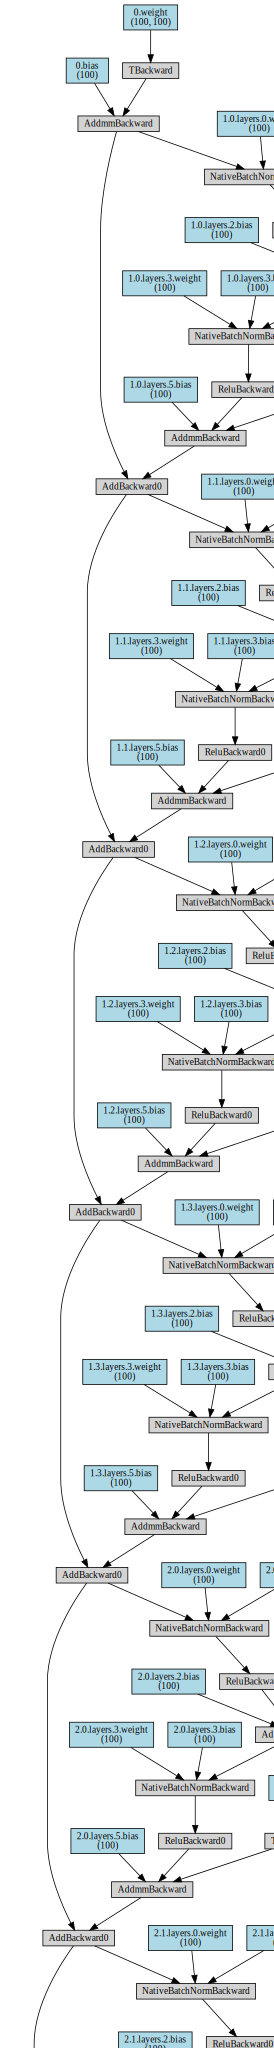

In [10]:
g